In [ ]:
# Task_1 - Q_2 - a)

In [ ]:
import torch 
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import DataLoader
from networks import ConvNet  
from utils import get_dataset
from torchinfo import summary  

# Define FLOPs calculation function
def calculate_flops(model, input_size):
    model_summary = summary(model, input_size=input_size, verbose=0)
    flops = model_summary.total_mult_adds 
    return flops

# Define the training function
def train_model(model, train_loader, epochs=20, initial_lr=0.01):
    optimizer = optim.SGD(model.parameters(), lr=initial_lr, momentum=0.9, weight_decay=1e-4)
    scheduler = CosineAnnealingLR(optimizer, T_max=epochs)
    criterion = nn.CrossEntropyLoss()
    model.train()
    
    for epoch in range(epochs):
        total_loss, correct = 0, 0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(targets).sum().item()

        accuracy = 100. * correct / len(train_loader.dataset)
        scheduler.step()
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {total_loss/100:.4f}, Accuracy: {accuracy:.2f}%")
        
    return model

# Define testing and FLOPs calculation
def test_model(model, test_loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            correct += predicted.eq(targets).sum().item()

    accuracy = 100. * correct / len(test_loader.dataset)
    print(f"Test Accuracy: {accuracy:.2f}%")

    # Calculate FLOPs for a single forward pass
    input_size = (1, *inputs.shape[1:]) 
    flops = calculate_flops(model, input_size)
    print(f"FLOPs for a single forward pass: {flops:.2e}")
    return accuracy, flops

# Load MNIST dataset using get_dataset
channel, im_size, num_classes, class_names, mean, std, train_dataset, test_dataset, test_loader = get_dataset('MNIST', './mnist_dataset')

# Create DataLoader with batch size of 256
train_loader_mnist = DataLoader(train_dataset, batch_size=256, shuffle=True)

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize ConvNet-3 for MNIST
model_mnist = ConvNet(channel=channel, num_classes=num_classes, net_width=128, net_depth=3, net_act='relu', net_norm='batchnorm', net_pooling='avgpooling', im_size=im_size).to(device)

# Train and evaluate ConvNet-3 on MNIST
print("Training ConvNet-3 on MNIST:")
model_mnist = train_model(model_mnist, train_loader_mnist, epochs=20)
mnist_accuracy, mnist_flops = test_model(model_mnist, test_loader)


Training ConvNet-3 on MNIST:
Epoch [1/20], Loss: 0.4752, Accuracy: 94.42%
Epoch [2/20], Loss: 0.1248, Accuracy: 98.51%
Epoch [3/20], Loss: 0.0917, Accuracy: 98.89%
Epoch [4/20], Loss: 0.0794, Accuracy: 99.02%
Epoch [5/20], Loss: 0.0658, Accuracy: 99.24%
Epoch [6/20], Loss: 0.0597, Accuracy: 99.30%
Epoch [7/20], Loss: 0.0511, Accuracy: 99.40%
Epoch [8/20], Loss: 0.0461, Accuracy: 99.45%
Epoch [9/20], Loss: 0.0428, Accuracy: 99.50%
Epoch [10/20], Loss: 0.0370, Accuracy: 99.57%
Epoch [11/20], Loss: 0.0330, Accuracy: 99.64%
Epoch [12/20], Loss: 0.0309, Accuracy: 99.67%
Epoch [13/20], Loss: 0.0283, Accuracy: 99.71%
Epoch [14/20], Loss: 0.0264, Accuracy: 99.74%
Epoch [15/20], Loss: 0.0244, Accuracy: 99.78%
Epoch [16/20], Loss: 0.0230, Accuracy: 99.81%
Epoch [17/20], Loss: 0.0222, Accuracy: 99.82%
Epoch [18/20], Loss: 0.0218, Accuracy: 99.83%
Epoch [19/20], Loss: 0.0211, Accuracy: 99.85%
Epoch [20/20], Loss: 0.0210, Accuracy: 99.84%
Test Accuracy: 99.43%
FLOPs for a single forward pass: 4.86e

In [ ]:
# Task_1 - Q_2 - b) & c) & e)

Epoch 1/20
Epoch [1/20], Loss: 0.3759, Accuracy: 93.98%
Epoch 2/20
Epoch [2/20], Loss: 0.3757, Accuracy: 94.00%
Epoch 3/20
Epoch [3/20], Loss: 0.3761, Accuracy: 93.87%
Epoch 4/20
Epoch [4/20], Loss: 0.3761, Accuracy: 94.00%
Epoch 5/20
Epoch [5/20], Loss: 0.3755, Accuracy: 94.02%
Epoch 6/20
Epoch [6/20], Loss: 0.3768, Accuracy: 93.99%
Epoch 7/20
Epoch [7/20], Loss: 0.3736, Accuracy: 94.09%
Epoch 8/20
Epoch [8/20], Loss: 0.3770, Accuracy: 93.97%
Epoch 9/20
Epoch [9/20], Loss: 0.3762, Accuracy: 94.06%
Epoch 10/20
Epoch [10/20], Loss: 0.3748, Accuracy: 94.00%
Epoch 11/20
Epoch [11/20], Loss: 0.3748, Accuracy: 94.01%
Epoch 12/20
Epoch [12/20], Loss: 0.3754, Accuracy: 94.03%
Epoch 13/20
Epoch [13/20], Loss: 0.3756, Accuracy: 93.97%
Epoch 14/20
Epoch [14/20], Loss: 0.3768, Accuracy: 93.91%
Epoch 15/20
Epoch [15/20], Loss: 0.3769, Accuracy: 93.95%
Epoch 16/20
Epoch [16/20], Loss: 0.3753, Accuracy: 94.04%
Epoch 17/20
Epoch [17/20], Loss: 0.3754, Accuracy: 94.00%
Epoch 18/20
Epoch [18/20], Loss:

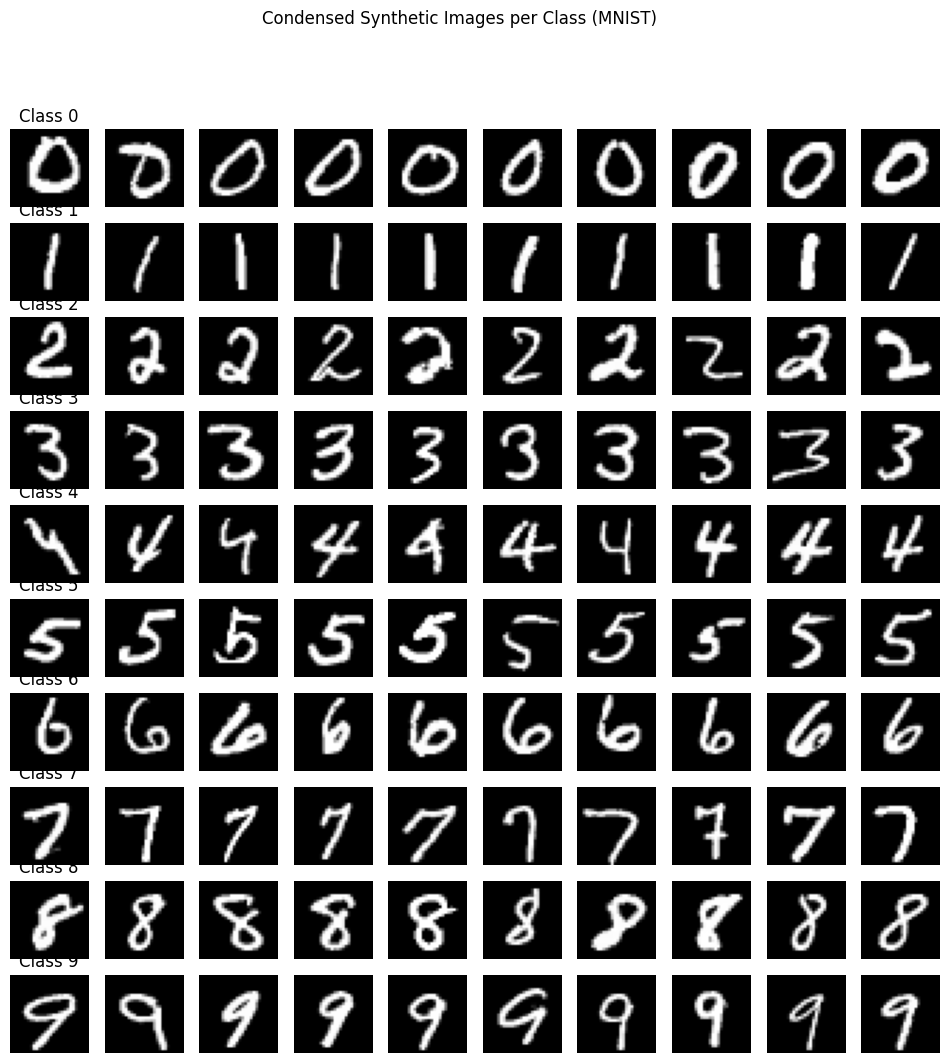

Test Accuracy after Attention Matching: 89.44%
Condensed synthetic dataset saved as synthetic_mnist.pt


In [ ]:
import os
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader, Dataset
from networks import ConvNet
from utils import get_dataset

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the attention matching function with synthetic data initialized from real images
def run_attention_matching_mnist(
    num_reinitializations=100,       # Number of random weight initializations
    model_iterations=50,            # Number of optimization steps for the model
    synthetic_lr=0.1,               # Learning rate for synthetic data optimization
    synthetic_iterations=1,         # Number of optimization steps for synthetic data
    model_lr=0.01,                  # Learning rate for the model
    task_balance_lambda=0.01,       # Weight for attention matching loss
    num_epochs=20,                  # Number of training epochs
    images_per_class=10,            # Number of images per class in synthetic dataset
    minibatch_size=256              # Batch size for real dataset
):
    # Set up MNIST data loader
    transform = transforms.Compose([transforms.ToTensor()])
    mnist_train = get_dataset('MNIST', './data')[6]  
    mnist_test = get_dataset('MNIST', './data')[7]   

    train_loader = DataLoader(mnist_train, batch_size=minibatch_size, shuffle=True)
    test_loader = DataLoader(mnist_test, batch_size=minibatch_size, shuffle=False)

    # Initialize synthetic data by randomly selecting real images from the MNIST dataset
    num_classes = 10
    synthetic_data = []

    # Group MNIST training images by class for easier selection
    mnist_images_by_class = {i: [] for i in range(num_classes)}
    for image, label in mnist_train:
        mnist_images_by_class[label].append(image)

    # Randomly select images_per_class real images for each class
    for class_idx in range(num_classes):
        selected_images = random.sample(mnist_images_by_class[class_idx], images_per_class)
        class_tensor = torch.stack([img for img in selected_images]).to(device).requires_grad_(True)
        synthetic_data.append(class_tensor)

    # Generate labels for the synthetic dataset
    synthetic_labels = torch.tensor([i for i in range(num_classes) for _ in range(images_per_class)], device=device)

    # Start Attention Matching process
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        epoch_loss = 0 
        correct = 0
        total = 0

        for weight_init_iter in range(num_reinitializations):
            # Initialize the ConvNet model for each reinitialization
            model = ConvNet(
                channel=1, num_classes=10, net_width=128, net_depth=3,
                net_act='relu', net_norm='batchnorm', net_pooling='avgpooling', im_size=(28, 28)
            ).to(device)

            model_optimizer = optim.SGD(model.parameters(), lr=model_lr, momentum=0.9)
            criterion = nn.CrossEntropyLoss()

            # Model training on synthetic data for model_iterations
            for update_step in range(model_iterations):
                synthetic_inputs = torch.cat([sd.clone().detach().requires_grad_(True) for sd in synthetic_data]).to(device)
                model_output = model(synthetic_inputs)
                model_loss = criterion(model_output, synthetic_labels)
                model_optimizer.zero_grad()
                model_loss.backward()
                model_optimizer.step()
                epoch_loss += model_loss.item()

                # Calculate accuracy on synthetic data
                _, predicted = model_output.max(1)
                total += synthetic_labels.size(0)
                correct += predicted.eq(synthetic_labels).sum().item()

        # Calculate and print loss and accuracy for the epoch
        accuracy = 100. * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / (num_reinitializations * model_iterations):.4f}, Accuracy: {accuracy:.2f}%")

        # Update synthetic data with attention matching
        for synthetic_step in range(synthetic_iterations):
            for class_idx, synthetic_class_data in enumerate(synthetic_data):
                synthetic_class_data = synthetic_class_data.clone().detach().requires_grad_(True)
                synthetic_optimizer = optim.SGD([synthetic_class_data], lr=synthetic_lr)
                real_images, real_labels = next(iter(train_loader))
                real_images, real_labels = real_images.to(device), real_labels.to(device)
                model.eval()
                synthetic_output = model(synthetic_class_data)
                real_output = model(real_images)
                attention_loss = task_balance_lambda * ((synthetic_output - real_output[:images_per_class].detach()) ** 2).mean()
                synthetic_optimizer.zero_grad()
                attention_loss.backward()
                synthetic_optimizer.step()
                synthetic_data[class_idx] = synthetic_class_data.detach().requires_grad_(True)
                
    visualize_synthetic_images(synthetic_data)
    evaluate_model(model, test_loader)
    save_synthetic_data(synthetic_data, synthetic_labels)

def visualize_synthetic_images(synthetic_data):
    num_classes = len(synthetic_data)
    images_per_class = synthetic_data[0].shape[0]  

    fig, axes = plt.subplots(num_classes, images_per_class, figsize=(12, 12))
    for class_idx, class_data in enumerate(synthetic_data):
        for img_idx in range(images_per_class):
            # Select each image in the class
            image = class_data[img_idx].detach().cpu().squeeze()
            axes[class_idx, img_idx].imshow(image, cmap='gray')
            axes[class_idx, img_idx].axis("off")
            if img_idx == 0:
                axes[class_idx, img_idx].set_title(f"Class {class_idx}")

    plt.suptitle("Condensed Synthetic Images per Class (MNIST)")
    plt.show()
    
def save_synthetic_data(synthetic_data, synthetic_labels, filename="synthetic_mnist.pt"):
    # Convert synthetic_data to a single tensor for saving
    synthetic_data_tensor = torch.cat([data.cpu() for data in synthetic_data])
    synthetic_labels = synthetic_labels.cpu()  
    torch.save({'images': synthetic_data_tensor, 'labels': synthetic_labels}, filename)
    print(f"Condensed synthetic dataset saved as {filename}")
    
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100. * correct / total
    print(f"Test Accuracy after Attention Matching: {test_accuracy:.2f}%")

# Run the attention matching with MNIST
run_attention_matching_mnist()


In [ ]:
# Task_1 - Q_2 - c) & d) & e) with Gaussian noise

Running with fixed Gaussian noise standard deviation: 0.4
Epoch 1/20
Epoch [1/20], Loss: 0.4211, Accuracy: 93.11%
Epoch 2/20
Epoch [2/20], Loss: 0.4225, Accuracy: 93.02%
Epoch 3/20
Epoch [3/20], Loss: 0.4216, Accuracy: 93.03%
Epoch 4/20
Epoch [4/20], Loss: 0.4224, Accuracy: 93.02%
Epoch 5/20
Epoch [5/20], Loss: 0.4207, Accuracy: 93.14%
Epoch 6/20
Epoch [6/20], Loss: 0.4237, Accuracy: 93.03%
Epoch 7/20
Epoch [7/20], Loss: 0.4226, Accuracy: 93.00%
Epoch 8/20
Epoch [8/20], Loss: 0.4217, Accuracy: 93.15%
Epoch 9/20
Epoch [9/20], Loss: 0.4231, Accuracy: 93.03%
Epoch 10/20
Epoch [10/20], Loss: 0.4243, Accuracy: 93.01%
Epoch 11/20
Epoch [11/20], Loss: 0.4229, Accuracy: 93.01%
Epoch 12/20
Epoch [12/20], Loss: 0.4219, Accuracy: 93.05%
Epoch 13/20
Epoch [13/20], Loss: 0.4231, Accuracy: 93.03%
Epoch 14/20
Epoch [14/20], Loss: 0.4215, Accuracy: 93.11%
Epoch 15/20
Epoch [15/20], Loss: 0.4233, Accuracy: 92.98%
Epoch 16/20
Epoch [16/20], Loss: 0.4236, Accuracy: 93.05%
Epoch 17/20
Epoch [17/20], Loss:

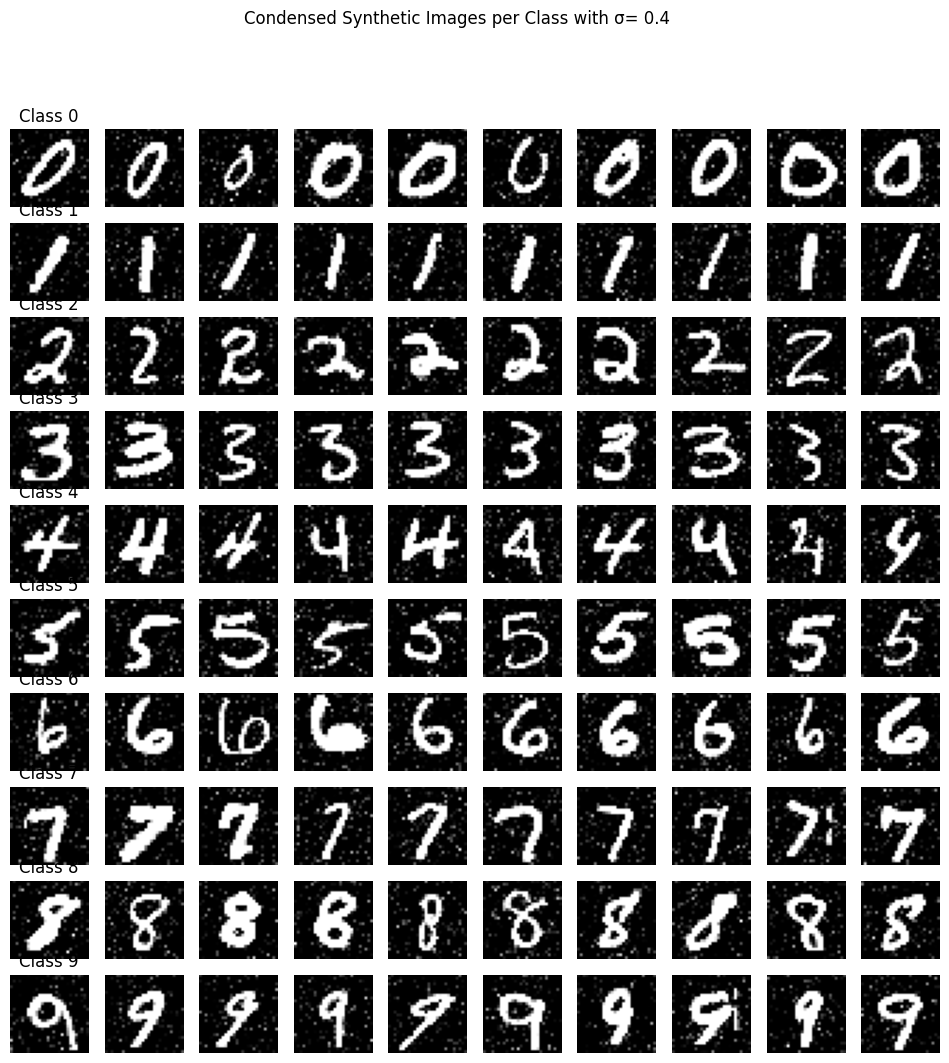

Condensed synthetic dataset saved as synthetic_mnist_noise.pt


In [ ]:
import os
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader, Dataset
from networks import ConvNet
from utils import get_dataset

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the attention matching function with synthetic data initialized from real images
def run_attention_matching_mnist(
    num_weight_initializations=100,
    model_update_steps=50,
    lr_synthetic=0.1,
    synthetic_update_steps=1,
    lr_model=0.01,
    task_balance_lambda=0.01,
    num_epochs=20,
    images_per_class=10,
    minibatch_size=256,
    gaussian_std=0.4 
):
    # Set up MNIST data loader
    transform = transforms.Compose([transforms.ToTensor()])
    mnist_train = get_dataset('MNIST', './data')[6]  
    mnist_test = get_dataset('MNIST', './data')[7]   
    train_loader = DataLoader(mnist_train, batch_size=minibatch_size, shuffle=True)
    test_loader = DataLoader(mnist_test, batch_size=minibatch_size, shuffle=False)
    print(f"Running with fixed Gaussian noise standard deviation: {gaussian_std}")

    # Initialize synthetic data with Gaussian noise
    num_classes = 10
    synthetic_data = []

    # Define Gaussian noise mean
    gaussian_mean = 0

    # Randomly select images_per_class real images for each class and add Gaussian noise
    mnist_images_by_class = {i: [] for i in range(num_classes)}
    for image, label in mnist_train:
        mnist_images_by_class[label].append(image)

    for class_idx in range(num_classes):
        selected_images = random.sample(mnist_images_by_class[class_idx], images_per_class)
        
        # Stack images and apply Gaussian noise
        class_tensor = torch.stack([img for img in selected_images]).to(device).requires_grad_(True)
        noise = torch.randn_like(class_tensor) * gaussian_std + gaussian_mean
        class_tensor = (class_tensor + noise).clamp(0, 1)  
        synthetic_data.append(class_tensor)

    # Generate labels for the synthetic dataset
    synthetic_labels = torch.tensor([i for i in range(num_classes) for _ in range(images_per_class)], device=device)

    # Start Attention Matching process
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        epoch_loss = 0  
        correct = 0
        total = 0

        for weight_init_iter in range(num_weight_initializations):
            # Initialize the ConvNet model for each reinitialization
            model = ConvNet(
                channel=1, num_classes=10, net_width=128, net_depth=3,
                net_act='relu', net_norm='batchnorm', net_pooling='avgpooling', im_size=(28, 28)
            ).to(device)

            model_optimizer = optim.SGD(model.parameters(), lr=lr_model, momentum=0.9)
            criterion = nn.CrossEntropyLoss()

            # Model training on synthetic data for model_update_steps
            for update_step in range(model_update_steps):
                synthetic_inputs = torch.cat([sd.clone().detach().requires_grad_(True) for sd in synthetic_data]).to(device)
                model_output = model(synthetic_inputs)
                model_loss = criterion(model_output, synthetic_labels)
                model_optimizer.zero_grad()
                model_loss.backward()
                model_optimizer.step()
                epoch_loss += model_loss.item()

                # Calculate accuracy on synthetic data
                _, predicted = model_output.max(1)
                total += synthetic_labels.size(0)
                correct += predicted.eq(synthetic_labels).sum().item()

        # Calculate and print loss and accuracy for the epoch
        accuracy = 100. * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / (num_weight_initializations * model_update_steps):.4f}, Accuracy: {accuracy:.2f}%")

        # Update synthetic data with attention matching
        for synthetic_step in range(synthetic_update_steps):
            for class_idx, synthetic_class_data in enumerate(synthetic_data):
                synthetic_class_data = synthetic_class_data.clone().detach().requires_grad_(True)
                synthetic_optimizer = optim.SGD([synthetic_class_data], lr=lr_synthetic)
                real_images, real_labels = next(iter(train_loader))
                real_images, real_labels = real_images.to(device), real_labels.to(device)
                model.eval()
                synthetic_output = model(synthetic_class_data)
                real_output = model(real_images)
                attention_loss = task_balance_lambda * ((synthetic_output - real_output[:images_per_class].detach()) ** 2).mean()
                synthetic_optimizer.zero_grad()
                attention_loss.backward()
                synthetic_optimizer.step()
                synthetic_data[class_idx] = synthetic_class_data.detach().requires_grad_(True)

    # Evaluate and visualize the results with fixed Gaussian noise
    test_accuracy = evaluate_model(model, test_loader)
    print(f"Test Accuracy with fixed Gaussian noise (σ={gaussian_std}): {test_accuracy:.2f}%\n")
    visualize_synthetic_images(synthetic_data, gaussian_std, test_accuracy)
    # Save the condensed dataset
    save_synthetic_data(synthetic_data, synthetic_labels)

def visualize_synthetic_images(synthetic_data, gaussian_std, test_accuracy):
    num_classes = len(synthetic_data)
    images_per_class = synthetic_data[0].shape[0]  

    fig, axes = plt.subplots(num_classes, images_per_class, figsize=(12, 12))
    for class_idx, class_data in enumerate(synthetic_data):
        for img_idx in range(images_per_class):
            # Select each image in the class
            image = class_data[img_idx].detach().cpu().squeeze()
            axes[class_idx, img_idx].imshow(image, cmap='gray')
            axes[class_idx, img_idx].axis("off")
            if img_idx == 0:
                axes[class_idx, img_idx].set_title(f"Class {class_idx}")

    plt.suptitle(f"Condensed Synthetic Images per Class with σ= {gaussian_std} ")
    plt.show()
    
def save_synthetic_data(synthetic_data, synthetic_labels, filename="synthetic_mnist_noise.pt"):
    # Convert synthetic_data to a single tensor for saving
    synthetic_data_tensor = torch.cat([data.cpu() for data in synthetic_data])
    synthetic_labels = synthetic_labels.cpu()  
    torch.save({'images': synthetic_data_tensor, 'labels': synthetic_labels}, filename)
    print(f"Condensed synthetic dataset saved as {filename}")
    
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100. * correct / total
    print(f"Test Accuracy after Attention Matching: {test_accuracy:.2f}%")
    return test_accuracy

# Run the attention matching with MNIST
run_attention_matching_mnist()


In [ ]:
# Question 3

In [ ]:
import os
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from networks import LeNet  
from utils import get_dataset, get_network  

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to load the synthetic dataset
def load_synthetic_data(path="./synthetic_mnist.pt"):
    data_dict = torch.load(path)
    synthetic_data = data_dict["images"].to(device) 
    synthetic_labels = data_dict["labels"].to(device) 
    return synthetic_data, synthetic_labels

# Function to train the model on synthetic data
def train_model_on_synthetic(model, synthetic_data, synthetic_labels, num_epochs=20, lr=0.01):
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()

    # Create a DataLoader from synthetic data for training
    synthetic_dataset = TensorDataset(synthetic_data, synthetic_labels)
    synthetic_loader = DataLoader(synthetic_dataset, batch_size=64, shuffle=True)

    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in synthetic_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(synthetic_loader):.4f}")

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100. * correct / total
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    return test_accuracy

# Main function to load synthetic data, train LeNet, and evaluate
def main():
    # Load synthetic MNIST dataset
    synthetic_data_path = "./synthetic_mnist.pt"  
    synthetic_data, synthetic_labels = load_synthetic_data(synthetic_data_path)

    # Set up MNIST test data loader using get_dataset
    transform = transforms.Compose([transforms.ToTensor()])
    mnist_train = get_dataset('MNIST', './data')[6]  
    mnist_test = get_dataset('MNIST', './data')[7]   
    test_loader = DataLoader(mnist_test, batch_size=256, shuffle=False)

    # Initialize LeNet model with correct input channels (1 for MNIST grayscale images)
    model = LeNet(channel=1, num_classes=10).to(device) 

    # Train LeNet on synthetic MNIST dataset
    print("Training LeNet on synthetic MNIST data...")
    train_model_on_synthetic(model, synthetic_data, synthetic_labels, num_epochs=20, lr=0.01)

    # Evaluate LeNet on the original MNIST test set
    print("Evaluating LeNet on the MNIST test set...")
    test_accuracy = evaluate_model(model, test_loader)
    print(f"Final Test Accuracy on MNIST test set: {test_accuracy:.2f}%")

# Run the main function
if __name__ == "__main__":
    main()


Training LeNet on synthetic MNIST data...
Epoch [1/20], Loss: 2.3086
Epoch [2/20], Loss: 2.3068
Epoch [3/20], Loss: 2.3080
Epoch [4/20], Loss: 2.3020
Epoch [5/20], Loss: 2.2980
Epoch [6/20], Loss: 2.2986
Epoch [7/20], Loss: 2.2912
Epoch [8/20], Loss: 2.2905
Epoch [9/20], Loss: 2.2889
Epoch [10/20], Loss: 2.2904
Epoch [11/20], Loss: 2.2854
Epoch [12/20], Loss: 2.2772
Epoch [13/20], Loss: 2.2757
Epoch [14/20], Loss: 2.2709
Epoch [15/20], Loss: 2.2663
Epoch [16/20], Loss: 2.2635
Epoch [17/20], Loss: 2.2557
Epoch [18/20], Loss: 2.2461
Epoch [19/20], Loss: 2.2357
Epoch [20/20], Loss: 2.2265
Evaluating LeNet on the MNIST test set...
Test Accuracy: 37.87%
Final Test Accuracy on MNIST test set: 37.87%


In [ ]:
# Question 4

In [ ]:
import os
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from utils import get_network, get_dataset  
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to load synthetic noisy MNIST dataset
def load_synthetic_data(path="./synthetic_mnist_noise.pt"):
    data_dict = torch.load(path)
    synthetic_data = torch.cat(data_dict["synthetic_data"]).to(device)  
    synthetic_labels = data_dict["synthetic_labels"].to(device)
    return synthetic_data, synthetic_labels

# Function to train model on synthetic data
def train_model_on_synthetic(model, synthetic_data, synthetic_labels, num_epochs=20, lr=0.01):
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    synthetic_dataset = TensorDataset(synthetic_data, synthetic_labels)
    synthetic_loader = DataLoader(synthetic_dataset, batch_size=64, shuffle=True)

    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in synthetic_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(synthetic_loader):.4f}")

# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = 100. * correct / total
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    return test_accuracy

# Main function to load synthetic data, train, and evaluate
def main():
    # Load synthetic noisy MNIST dataset
    synthetic_data, synthetic_labels = load_synthetic_data("synthetic_mnist_noise.pt")

    # Load MNIST test data
    transform = transforms.Compose([transforms.ToTensor()])
    _, mnist_test = get_dataset('MNIST', './data')[6:8]  
    test_loader = DataLoader(mnist_test, batch_size=256, shuffle=False)

    # Initialize model using get_network (e.g., ResNet18 or LeNet)
    model = get_network("LeNet", channel=1, num_classes=10).to(device)

    # Train model on synthetic noisy MNIST dataset
    print("Training model on synthetic noisy MNIST data...")
    train_model_on_synthetic(model, synthetic_data, synthetic_labels, num_epochs=20, lr=0.01)

    # Evaluate model on the original MNIST test set
    print("Evaluating model on the real MNIST test set...")
    test_accuracy = evaluate_model(model, test_loader)
    print(f"Final Test Accuracy on real MNIST test set: {test_accuracy:.2f}%")

# Run the main function
if __name__ == "__main__":
    main()


Training model on synthetic noisy MNIST data...
Epoch [1/20], Loss: 2.3004
Epoch [2/20], Loss: 2.3036
Epoch [3/20], Loss: 2.3051
Epoch [4/20], Loss: 2.3041
Epoch [5/20], Loss: 2.3056
Epoch [6/20], Loss: 2.3051
Epoch [7/20], Loss: 2.3037
Epoch [8/20], Loss: 2.3029
Epoch [9/20], Loss: 2.3073
Epoch [10/20], Loss: 2.3050
Epoch [11/20], Loss: 2.3049
Epoch [12/20], Loss: 2.3054
Epoch [13/20], Loss: 2.3027
Epoch [14/20], Loss: 2.3061
Epoch [15/20], Loss: 2.3023
Epoch [16/20], Loss: 2.3050
Epoch [17/20], Loss: 2.3038
Epoch [18/20], Loss: 2.3046
Epoch [19/20], Loss: 2.3014
Epoch [20/20], Loss: 2.3028
Evaluating model on the real MNIST test set...
Test Accuracy: 10.28%
Final Test Accuracy on real MNIST test set: 10.28%
